**extracting the compressed dataset**

In [1]:

from zipfile import ZipFile
dataset = 'archive.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [2]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**DATA PROCESSING**

In [3]:
twitter_data=pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1')
twitter_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
twitter_data.shape

(1599999, 6)

In [5]:
column_names=['Target','Id','Date','Flag','User','Text']
twitter_data=pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1',names=column_names)
twitter_data.head()

,Target,Id,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
twitter_data.shape

(1600000, 6)

In [7]:
twitter_data.isnull().sum()

,0
Target,0
Id,0
Date,0
Flag,0
User,0
Text,0


In [8]:
twitter_data['Target'].value_counts()

,count
Target,
0,800000
4,800000


**convert the target "4" to "1"**

In [9]:
twitter_data['Target']=twitter_data['Target'].replace(4,1)
twitter_data['Target'].value_counts()

,count
Target,
0,800000
1,800000


0--- Negative Tweet 1---Positive Tweet

<Axes: xlabel='Target', ylabel='count'>

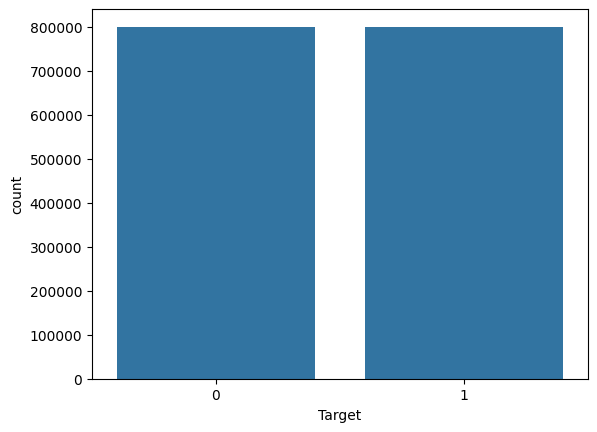

In [10]:
import seaborn as sns
sns.countplot(x='Target',data=twitter_data)

In [11]:
twitter_data['tweet']=twitter_data['Text'].str.lower()
twitter_data['tweet'].tail()

,tweet
1599995,just woke up. having no school is the best fee...
1599996,thewdb.com - very cool to hear old walt interv...
1599997,are you ready for your mojo makeover? ask me f...
1599998,happy 38th birthday to my boo of alll time!!! ...
1599999,happy #charitytuesday @thenspcc @sparkscharity...


In [12]:
from nltk.corpus import stopwords # This will require to remove the stopwords
from nltk.stem.porter import PorterStemmer # The will require to stem the words

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
STOPWORDS = stopwords.words('english')
print(STOPWORDS)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**Removing stopwords**

In [15]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
twitter_data['tweet'] = twitter_data['tweet'].apply(lambda text: cleaning_stopwords(text))
twitter_data['tweet'].head()

,tweet
0,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,upset can't update facebook texting it... migh...
2,@kenichan dived many times ball. managed save ...
3,whole body feels itchy like fire
4,"@nationwideclass no, behaving all. i'm mad. he..."


In [16]:
twitter_data['tweet'].tail()

,tweet
1599995,woke up. school best feeling ever
1599996,thewdb.com - cool hear old walt interviews! â...
1599997,ready mojo makeover? ask details
1599998,happy 38th birthday boo alll time!!! tupac ama...
1599999,happy #charitytuesday @thenspcc @sparkscharity...


**Removing all URLS**

In [17]:
# This will remove all the URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
twitter_data['tweet'] = twitter_data['tweet'].apply(lambda x: cleaning_URLs(x))
twitter_data['tweet'].head()

,tweet
0,@switchfoot s bummer. shoulda got david carr ...
1,upset can't update facebook texting it... migh...
2,@kenichan dived many times ball. managed save ...
3,whole body feels itchy like fire
4,"@nationwideclass no, behaving all. i'm mad. he..."


**Cleaning Numbers**

In [18]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
twitter_data['tweet'] = twitter_data['tweet'].apply(lambda x: cleaning_numbers(x))
twitter_data['tweet'].tail()

,tweet
1599995,woke up. school best feeling ever
1599996,thewdb.com - cool hear old walt interviews! â«
1599997,ready mojo makeover? ask details
1599998,happy th birthday boo alll time!!! tupac amaru...
1599999,happy #charitytuesday @thenspcc @sparkscharity...


**Removing all the mentions and Hastags**

In [19]:
# This will remove all the mentions and Hastags
def cleaning_mentions(data):
    return re.sub(r'[@#]\w+', '', data)
twitter_data['tweet'] = twitter_data['tweet'].apply(lambda x: cleaning_mentions(x))
twitter_data['tweet'].tail()

,tweet
1599995,woke up. school best feeling ever
1599996,thewdb.com - cool hear old walt interviews! â«
1599997,ready mojo makeover? ask details
1599998,happy th birthday boo alll time!!! tupac amaru...
1599999,happy


**Tokenizer**

In [20]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
twitter_data['tweet'] = twitter_data['tweet'].apply(tokenizer.tokenize)
twitter_data['tweet'].head()

,tweet
0,"[s, bummer, shoulda, got, david, carr, third, ..."
1,"[upset, can, t, update, facebook, texting, it,..."
2,"[dived, many, times, ball, managed, save, rest..."
3,"[whole, body, feels, itchy, like, fire]"
4,"[no, behaving, all, i, m, mad, here, can, t, s..."


**Stemming**

In [21]:
from nltk import PorterStemmer
st = PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
twitter_data['tweet']= twitter_data['tweet'].apply(lambda x: stemming_on_text(x))
twitter_data['tweet'].head()

,tweet
0,"[s, bummer, shoulda, got, david, carr, third, ..."
1,"[upset, can, t, update, facebook, texting, it,..."
2,"[dived, many, times, ball, managed, save, rest..."
3,"[whole, body, feels, itchy, like, fire]"
4,"[no, behaving, all, i, m, mad, here, can, t, s..."


**Lemmatizer**

In [22]:
from nltk import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [23]:
lm = WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
twitter_data['tweet'] = twitter_data['tweet'].apply(lambda x: lemmatizer_on_text(x))
twitter_data['tweet'].head()

,tweet
0,"[s, bummer, shoulda, got, david, carr, third, ..."
1,"[upset, can, t, update, facebook, texting, it,..."
2,"[dived, many, times, ball, managed, save, rest..."
3,"[whole, body, feels, itchy, like, fire]"
4,"[no, behaving, all, i, m, mad, here, can, t, s..."


In [24]:
twitter_data.head()

,Target,Id,Date,Flag,User,Text,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","[s, bummer, shoulda, got, david, carr, third, ..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,"[upset, can, t, update, facebook, texting, it,..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,"[dived, many, times, ball, managed, save, rest..."
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,"[whole, body, feels, itchy, like, fire]"
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","[no, behaving, all, i, m, mad, here, can, t, s..."


In [25]:
!pip install WordCloud

In [26]:
# x=twitter_data['tweet']
# y=twitter_data['Target']
x=twitter_data['tweet'].apply(lambda x: ' '.join(x)) # Join the list of words back into a single string
y=twitter_data['Target']

In [27]:
print(x)

0             s bummer shoulda got david carr third day it d
1          upset can t update facebook texting it might c...
2          dived many times ball managed save rest go bounds
3                           whole body feels itchy like fire
4               no behaving all i m mad here can t see there
                                 ...                        
1599995                     woke up school best feeling ever
1599996           thewdb com cool hear old walt interviews â
1599997                      ready mojo makeover ask details
1599998    happy th birthday boo alll time tupac amaru sh...
1599999                                                happy
Name: tweet, Length: 1600000, dtype: object


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

**Converting the textual data to numerical data**

In [29]:
vectorizer=TfidfVectorizer()
vectorizer.fit(x_train)
x_train=vectorizer.transform(x_train)
x_test=vectorizer.transform(x_test)

In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1280000, 236840)
(1280000,)
(320000, 236840)
(320000,)


**Training the model**

In [31]:
model =LogisticRegression(max_iter=1000)

In [32]:
model.fit(x_train,y_train)


LogisticRegression(max_iter=1000)

**Model Evaluation**

In [33]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [34]:
print('Accuracy score of the training data : ', training_data_accuracy*100)

Accuracy score of the training data :  79.514296875


In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [36]:
confusion_matrix(y_train,x_train_prediction)

array([[494731, 145269],
       [116948, 523052]])

In [37]:
print(classification_report(x_train_prediction,y_train))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79    611679
           1       0.82      0.78      0.80    668321

    accuracy                           0.80   1280000
   macro avg       0.80      0.80      0.80   1280000
weighted avg       0.80      0.80      0.80   1280000



In [38]:
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [39]:
print('Accuracy score of the test data : ', test_data_accuracy*100)

Accuracy score of the test data :  78.1309375


In [40]:
confusion_matrix(y_test,x_test_prediction)

array([[121674,  38326],
       [ 31655, 128345]])

In [41]:
print(classification_report(x_test_prediction,y_test))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78    153329
           1       0.80      0.77      0.79    166671

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



In [44]:
from matplotlib import pyplot as plt

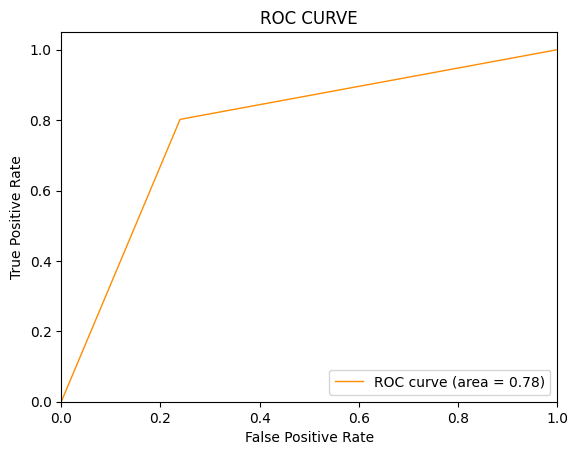

In [45]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, x_test_prediction)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**Saving the model**

In [46]:
import pickle


In [47]:
filename='trained_model.sav'
pickle.dump(model,open(filename,'wb'))

**using the saved model for future predictions**

In [48]:
loaded_model=pickle.load(open('/content/trained_model.sav','rb'))

In [49]:
x_new=x_test[200]
prediction=loaded_model.predict(x_new)
print(prediction)

if (prediction[0]==0):
  print('The tweet is negative')
else:
  print('The tweet is positive')

[1]
The tweet is positive


In [50]:
x_new=x_test[3]
prediction=loaded_model.predict(x_new)
print(prediction)

if (prediction[0]==0):
  print('The tweet is negative')
else:
  print('The tweet is positive')

[0]
The tweet is negative
